In [1]:
from keras.models import Sequential
from keras.layers import Dense
import h5py as h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

Using TensorFlow backend.


In [0]:
import glob

import matplotlib.pylab as plt
import matplotlib.cm as cm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [0]:
from keras import backend as K
from keras import initializers, layers
from keras.engine.topology import Layer

from keras.utils import to_categorical

from sklearn import metrics
from sklearn import tree, ensemble
import scipy.io as sio

In [0]:
from keras.models import Sequential, Model
from keras.optimizers import SGD, RMSprop, Adam, Nadam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

from keras.layers import Dense, Dropout, LSTM
from keras.layers import Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D 
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
h5 = h5py.File("/content/drive/My Drive/SVHN_single_grey1.h5","r")
list(h5.keys())
list
X_train = np.array(h5["X_train"])
X_test = np.array(h5["X_test"])
X_val = np.array(h5["X_val"])
y_test = np.array(h5["y_test"])
y_train = np.array(h5["y_train"])
y_val = np.array(h5["y_val"])

In [0]:
dataset_size = len(X_train)
X_train = X_train.reshape(dataset_size,-1)

In [0]:
dataset_size1 = len(X_test)
X_test = X_test.reshape(dataset_size1,-1)

In [0]:
dataset_size2 = len(X_val)
X_val = X_val.reshape(dataset_size2,-1)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5) 
clf.fit(X_train, y_train)  
print(clf.score(X_test, y_test))

0.49016666666666664


In [0]:
y_predict=clf.predict(X_test)

In [0]:
metrics.accuracy_score(y_test,y_predict)

0.49016666666666664

In [0]:
metrics.confusion_matrix(y_test,y_predict)

array([[1201,   60,   44,   37,   45,   45,  129,   31,  109,  113],
       [ 125, 1285,   83,   81,   84,   36,   36,   58,   18,   22],
       [ 126,  252,  932,  115,   44,   44,   28,  128,   69,   65],
       [ 164,  255,  166,  677,   54,  157,   36,   46,   92,   72],
       [ 148,  256,   47,   61, 1101,   30,   64,   17,   48,   40],
       [ 196,  179,   91,  261,   43,  637,  130,   31,  114,   86],
       [ 370,  120,   50,   70,  116,  154,  695,   16,  188,   53],
       [ 135,  254,  138,   78,   23,   26,   26, 1045,   28,   55],
       [ 330,  140,   71,  118,   84,  109,  256,   20,  592,   92],
       [ 382,  145,   83,  106,   51,   89,   86,   61,  143,  658]])

In [0]:
cr=metrics.classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.38      0.66      0.48      1814
           1       0.44      0.70      0.54      1828
           2       0.55      0.52      0.53      1803
           3       0.42      0.39      0.41      1719
           4       0.67      0.61      0.64      1812
           5       0.48      0.36      0.41      1768
           6       0.47      0.38      0.42      1832
           7       0.72      0.58      0.64      1808
           8       0.42      0.33      0.37      1812
           9       0.52      0.36      0.43      1804

    accuracy                           0.49     18000
   macro avg       0.51      0.49      0.49     18000
weighted avg       0.51      0.49      0.49     18000



In [0]:
X_train = np.array(h5["X_train"])
X_test = np.array(h5["X_test"])
X_val = np.array(h5["X_val"])
y_test = np.array(h5["y_test"])
y_train = np.array(h5["y_train"])
y_val = np.array(h5["y_val"])

In [8]:
print(y_train[:4])

[2 6 7 4]


In [9]:
X_train.shape

(42000, 32, 32)

In [10]:
from keras.utils import to_categorical

#print(y_train[:4])
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
y_train[:4]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
print(y_train.shape, y_test.shape, y_val.shape)

(42000, 10) (18000, 10) (60000, 10)


In [12]:
y_train[:1]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
print(X_train.shape, X_test.shape, X_val.shape)

(42000, 32, 32) (18000, 32, 32) (60000, 32, 32)


In [0]:
X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)
X_val = X_val.reshape(-1, 32, 32, 1)

In [0]:
X_train = np.concatenate([X_train, X_val])
y_train = np.concatenate([y_train, y_val])

In [16]:
print(X_train.shape, X_test.shape, X_val.shape)

(102000, 32, 32, 1) (18000, 32, 32, 1) (60000, 32, 32, 1)


In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [18]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(len(y_train[0]), activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                216330    
Total params: 290,826
Trainable params: 290,826
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_history = model.fit(X_train, y_train, batch_size=128, epochs=3, validation_split = 0.1)

Instructions for updating:
Use tf.cast instead.
Train on 91800 samples, validate on 10200 samples
Epoch 1/3
91800/91800 [==============================] - 270s 3ms/step - loss: 1.0336 - acc: 0.6750 - val_loss: 0.5336 - val_acc: 0.8477
Epoch 2/3
91800/91800 [==============================] - 274s 3ms/step - loss: 0.5047 - acc: 0.8586 - val_loss: 0.4167 - val_acc: 0.8833
Epoch 3/3
91800/91800 [==============================] - 272s 3ms/step - loss: 0.4149 - acc: 0.8846 - val_loss: 0.3267 - val_acc: 0.9160


In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.4187601789765888
Test accuracy: 0.8817222222222222


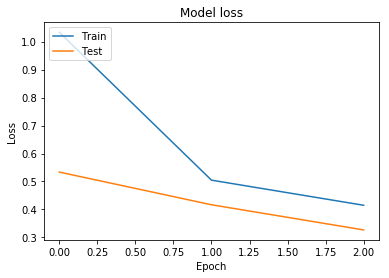

In [22]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

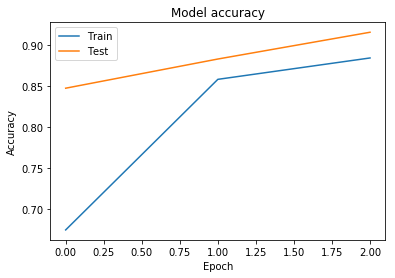

In [23]:
# Plot training & validation accuracy values
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [25]:
model_history = model.fit(X_train, y_train, batch_size=128, epochs=3, validation_split = 0.1)

Train on 91800 samples, validate on 10200 samples
Epoch 1/3
91800/91800 [==============================] - 270s 3ms/step - loss: 0.0586 - acc: 0.9808 - val_loss: 0.0521 - val_acc: 0.9840
Epoch 2/3
91800/91800 [==============================] - 262s 3ms/step - loss: 0.0484 - acc: 0.9845 - val_loss: 0.0432 - val_acc: 0.9869
Epoch 3/3
91800/91800 [==============================] - 260s 3ms/step - loss: 0.0407 - acc: 0.9869 - val_loss: 0.0411 - val_acc: 0.9877


In [26]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.045383762647708256
Test accuracy: 0.9857222275733948


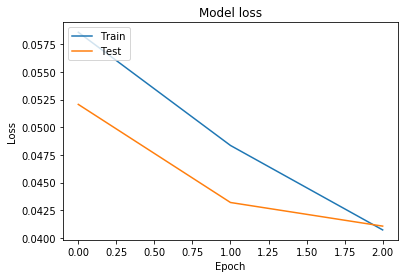

In [27]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

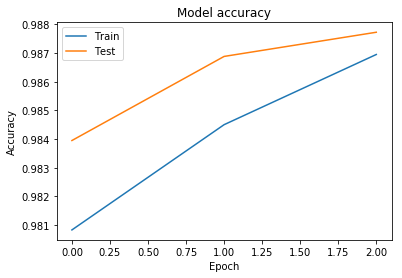

In [28]:
# Plot training & validation accuracy values
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras import optimizers

In [0]:
learning_rate = 0.00001
hidden_nodes = 256
output_nodes = 10

In [0]:
sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  
# Fit the model
model.fit(X_train, y_train, epochs=3, batch_size=1000, verbose= 1)

Epoch 1/3
102000/102000 [==============================] - 346s 3ms/step - loss: 0.1991 - acc: 0.9490
Epoch 2/3
102000/102000 [==============================] - 333s 3ms/step - loss: 0.1984 - acc: 0.9492
Epoch 3/3
102000/102000 [==============================] - 330s 3ms/step - loss: 0.1980 - acc: 0.9493


In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.27644909482532076
Test accuracy: 0.9275


Model with loss='categorical_crossentropy', optimizer='adadelta' gave accuracy of 88%

Model with loss='binary_crossentropy', optimizer='adam' gave accuracy of 98%

Model with loss='categorical_crossentropy', optimizer=sgd gave accuracy of 92.7%

KNN Classifier model gave accuracy of 49%.

So as per the outcome,  Neural Network models are better for image dataset.


In [0]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

In [0]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [0]:
X_train = np.array(h5["X_train"])
X_test = np.array(h5["X_test"])
X_val = np.array(h5["X_val"])
y_test = np.array(h5["y_test"])
y_train = np.array(h5["y_train"])
y_val = np.array(h5["y_val"])

In [0]:
X_train = np.concatenate([X_train, X_val])
y_train = np.concatenate([y_train, y_val])

In [0]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [0]:
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(len(y_train[0]), activation='softmax'))

In [0]:
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((1024,),input_shape=X_train[0].shape))
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))

#Dropout layer
model.add(tf.keras.layers.Dropout(0.5))

#Hidden layers
model.add(tf.keras.layers.Dense(60, activation='relu', name='Layer_3'))
model.add(tf.keras.layers.Dense(30, activation='relu', name='Layer_4'))

#Dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [0]:
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Train the model
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=30,
          batch_size=1000)

Train on 102000 samples, validate on 18000 samples
Epoch 1/30
102000/102000 [==============================] - 5s 45us/sample - loss: 0.4863 - acc: 0.8555 - val_loss: 0.4122 - val_acc: 0.8744
Epoch 2/30
102000/102000 [==============================] - 5s 50us/sample - loss: 0.4750 - acc: 0.8597 - val_loss: 0.3993 - val_acc: 0.8755
Epoch 3/30
102000/102000 [==============================] - 5s 49us/sample - loss: 0.4737 - acc: 0.8591 - val_loss: 0.3984 - val_acc: 0.8795
Epoch 4/30
102000/102000 [==============================] - 5s 48us/sample - loss: 0.4490 - acc: 0.8659 - val_loss: 0.3699 - val_acc: 0.8878
Epoch 5/30
102000/102000 [==============================] - 5s 48us/sample - loss: 0.4446 - acc: 0.8685 - val_loss: 0.3868 - val_acc: 0.8812
Epoch 6/30
102000/102000 [==============================] - 5s 48us/sample - loss: 0.4400 - acc: 0.8695 - val_loss: 0.3835 - val_acc: 0.8816
Epoch 7/30
102000/102000 [==============================] - 5s 49us/sample - loss: 0.4342 - acc: 0.8710

Model with loss='categorical_crossentropy', optimizer='adadelta' gave accuracy of 88%

Model with loss='binary_crossentropy', optimizer='adam' gave accuracy of 98%

Model with loss='categorical_crossentropy', optimizer=sgd gave accuracy of 92.7%

KNN Classifier model gave accuracy of 49%.

So as per the outcome, Neural Network models are better for image dataset.

With Batch Normalization accuracy is coming with 90%

Neural networks offer a number of advantages, including requiring less formal statistical training, ability to implicitly detect complex nonlinear relationships between dependent and independent variables, ability to detect all possible interactions between predictor variables, and the availability of multiple training algorithms.

The best fit model with 98% is loss='binary_crossentropy', optimizer='adam'

ANNs have the ability to learn and model non-linear and complex relationships, which is really important because in real-life, many of the relationships between inputs and outputs are non-linear as well as complex.

ANNs can generalize — After learning from the initial inputs and their relationships, it can infer unseen relationships on unseen data as well, thus making the model generalize and predict on unseen data.

Unlike many other prediction techniques, ANN does not impose any restrictions on the input variables (like how they should be distributed). Additionally, many studies have shown that ANNs can better model heteroskedasticity 

Given ANNs ability to take in a lot of inputs, process them to infer hidden as well as complex, non-linear relationships, ANNs are playing a big role in image and character recognition. 